# Principal Component Analysis with Cancer Data

In [71]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [72]:
df1=pd.read_csv("breast-cancer-wisconsin.data.txt")

In [73]:
Col_names=[  "Sample code number" ,      
    "Clump Thickness", 
    "Uniformity of Cell Size",       
    "Uniformity of Cell Shape",      
    "Marginal Adhesion",             
    "Single Epithelial Cell Size",   
    "Bare Nuclei",                   
    "Bland Chromatin",               
    "Normal Nucleoli",               
    "Mitoses",   
    "Class"]

In [74]:
df1.columns=Col_names

In [75]:
df1.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [76]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [77]:
df1=df1.drop(["Sample code number"],axis=1)


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [78]:
df1.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [79]:
df1.shape

(698, 10)

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
Clump Thickness                698 non-null int64
Uniformity of Cell Size        698 non-null int64
Uniformity of Cell Shape       698 non-null int64
Marginal Adhesion              698 non-null int64
Single Epithelial Cell Size    698 non-null int64
Bare Nuclei                    698 non-null object
Bland Chromatin                698 non-null int64
Normal Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [81]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column

df1.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [82]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
df1.loc[(df1["Bare Nuclei"]=="?"),["Bare Nuclei"]].count()



Bare Nuclei    16
dtype: int64

In [83]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

df1=df1.replace("?",np.nan)
df1["Bare Nuclei"]=df1["Bare Nuclei"].fillna(df1["Bare Nuclei"].median())
# The missing values were imputed with the column median. 


In [84]:
df1["Bare Nuclei"]=df1["Bare Nuclei"].astype("int")

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [85]:
# Check for correlation of variable
df1.corr().transpose()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.645366,0.655089,0.486699,0.522108,0.590430,0.558511,0.536176,0.350176,0.716509
Uniformity of Cell Size,0.645366,1.000000,0.906814,0.705397,0.751674,0.686457,0.755824,0.722699,0.458548,0.817772
Uniformity of Cell Shape,0.655089,0.906814,1.000000,0.682871,0.719524,0.707261,0.736066,0.719272,0.438756,0.818794
Marginal Adhesion,0.486699,0.705397,0.682871,1.000000,0.599402,0.666765,0.666759,0.603132,0.417476,0.696605
Single Epithelial Cell Size,0.522108,0.751674,0.719524,0.599402,1.000000,0.583484,0.616108,0.628704,0.478975,0.682618
Bare Nuclei,0.590430,0.686457,0.707261,0.666765,0.583484,1.000000,0.674281,0.574524,0.342203,0.818839
Bland Chromatin,0.558511,0.755824,0.736066,0.666759,0.616108,0.674281,1.000000,0.665914,0.344118,0.756732
Normal Nucleoli,0.536176,0.722699,0.719272,0.603132,0.628704,0.574524,0.665914,1.000000,0.428185,0.712067
Mitoses,0.350176,0.458548,0.438756,0.417476,0.478975,0.342203,0.344118,0.428185,1.000000,0.423008
Class,0.716509,0.817772,0.818794,0.696605,0.682618,0.818839,0.756732,0.712067,0.423008,1.000000


In [86]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\Abhyuday\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Abhyuday\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


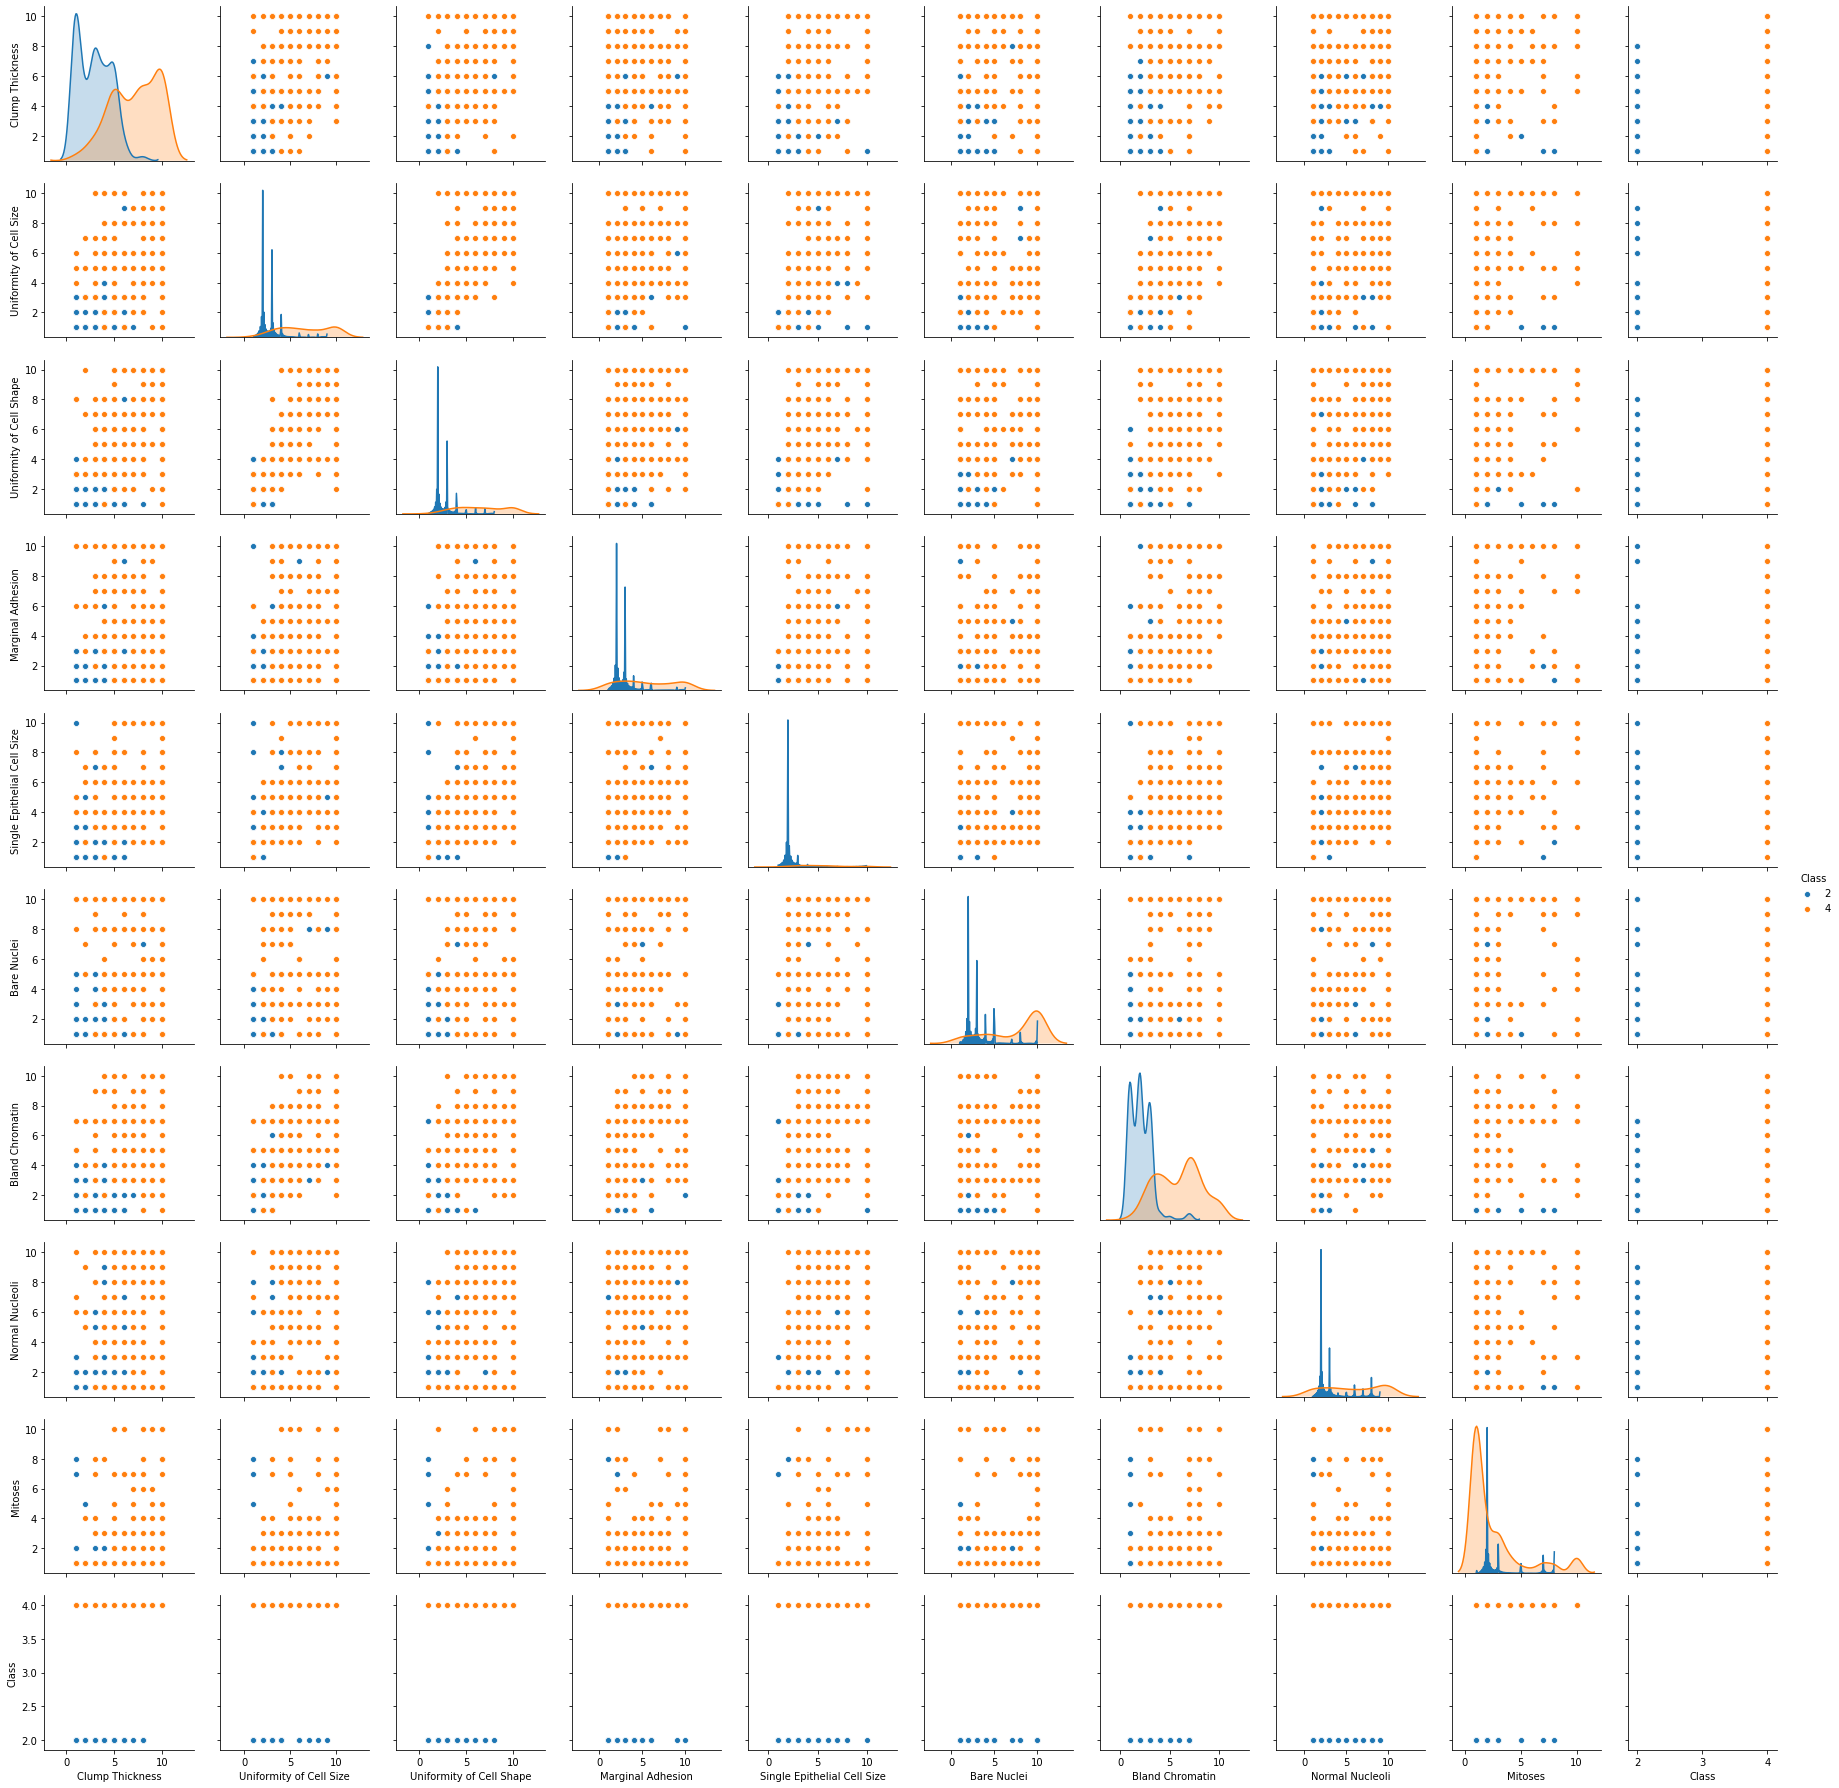

In [87]:
#Let us check for pair plots
sns.pairplot(df1,diag_kind="kde",hue="Class")

In [88]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10
# THESE STATISTICS ARE NOT SIGNIFICANT AS WE HAVE USED PARAMETRIC MEASUREMENTS FOR NON-PARAMETRIC DATA.

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9CDAE4860>,
      dtype=object)

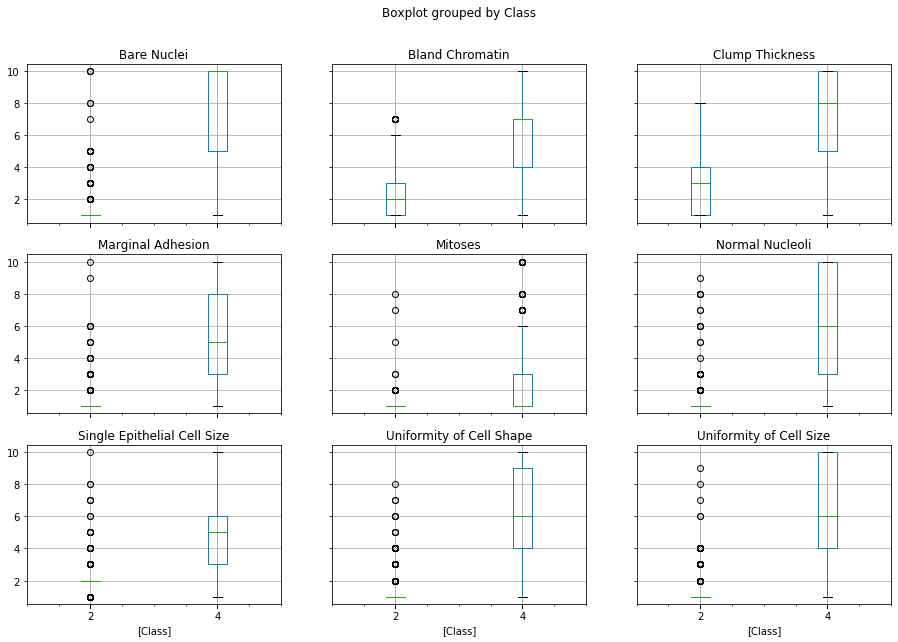

In [27]:
df1.boxplot(by="Class",layout=(3,3), figsize=(15, 10))

In [89]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,698.0,4.416905,2.817673,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,698.0,3.137536,3.052575,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,698.0,3.210602,2.972867,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,698.0,2.809456,2.856606,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,698.0,3.217765,2.215408,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,698.0,3.489971,3.623301,1.0,1.0,1.0,5.0,10.0
Bland Chromatin,698.0,3.438395,2.440056,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,698.0,2.869628,3.055004,1.0,1.0,1.0,4.0,10.0
Mitoses,698.0,1.590258,1.716162,1.0,1.0,1.0,1.0,10.0
Class,698.0,2.690544,0.951596,2.0,2.0,2.0,4.0,4.0


In [90]:
 
# THUS NO COLUMNS CAN BE DROPPED SAVE FOR THE CLASS COLUMN BECAUSE THE VARIABLES ARE CATEGORICAL. CHI SQUARE TEST WOULD 
#YEILD A PROPER CORRELATION. 

In [91]:
df1=df1.drop(["Class"],axis=1)

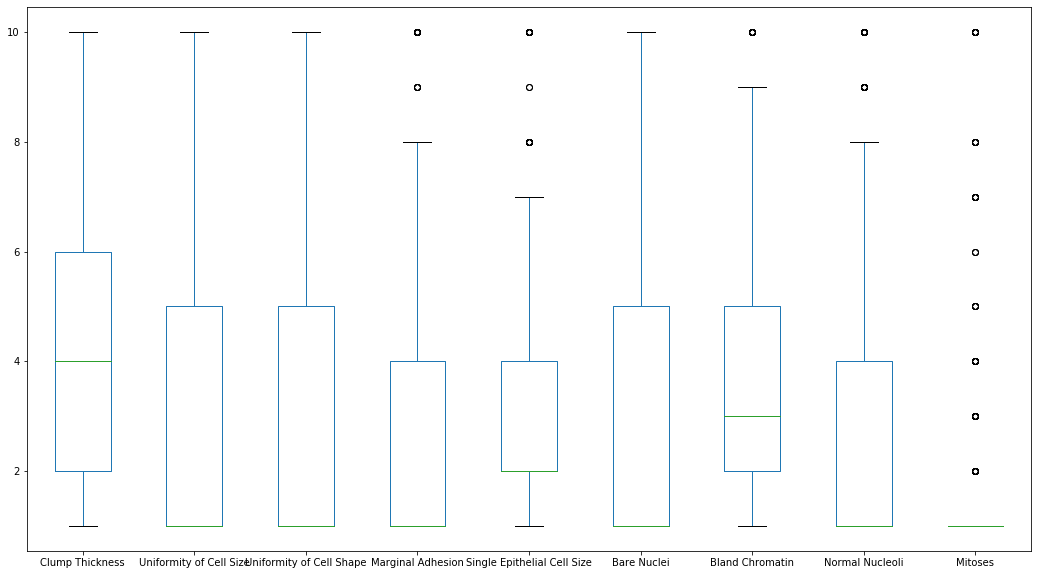

In [92]:
df1.plot.box(figsize=(18,10))

In [94]:
def function(group):
    median,std=group.median(),group.std()
    Q3=median+(25/100)
    outliers=(group-median).abs()>4*std
    group[outliers]=Q3
    return group 
df1.transform(function)

C:\Users\Abhyuday\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,4,4,5,7,10,3,2,1.0
1,3,1,1,1,2,2,3,1,1.0
2,6,8,8,1,3,4,3,7,1.0
3,4,1,1,3,2,1,3,1,1.0
4,8,10,10,8,7,10,9,7,1.0
...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1.0
694,2,1,1,1,2,1,1,1,1.0
695,5,10,10,3,7,3,8,10,2.0
696,4,8,6,4,3,4,10,6,1.0


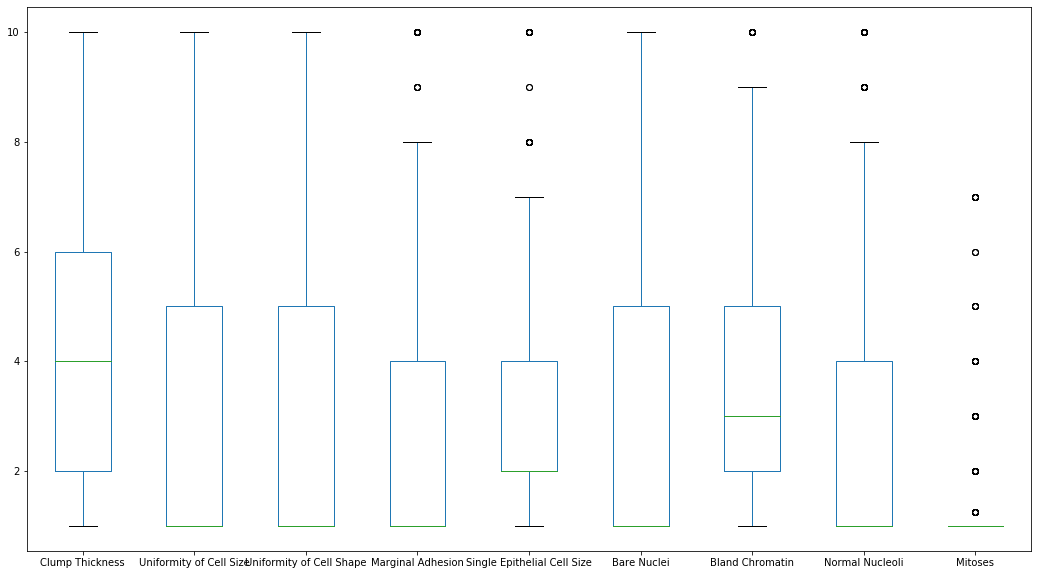

In [95]:
df1.plot.box(figsize=(18,10))

In [ ]:
#As it can be observed, the ouliers have been capped to Q3, the outliers four standard deviations away from the column meidan have been capped.

In [167]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats 
df1_std=StandardScaler(df1)
df1_mm=MinMaxScaler(df1)
df1_z=stats.zscore(df1)

# Q6 Create a covariance matrix for identifying Principal components

In [20]:
# PCA
# Step 1 - Create covariance matrix


In [122]:
df1_z_cov= np.cov(df1_z.T)

# Q7 Identify eigen values and eigen vector

In [21]:
# Step 2- Get eigen values and eigen vector

In [124]:
e_vals, e_vecs = np.linalg.eig(df1_z_cov)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.30432821 -0.14847269  0.00125577  0.86137392  0.05349306  0.02546932
  -0.23210627 -0.28711372  0.05963043]
 [-0.38255334 -0.10751413  0.73468372 -0.05599609  0.16904927 -0.09078164
   0.44231933  0.0157254   0.25784739]
 [-0.3789431  -0.13362769 -0.66570261  0.00543565  0.13350646 -0.05622322
   0.5861979   0.06405659  0.16321766]
 [-0.33517846  0.04122378 -0.04459995 -0.34662929 -0.47812171 -0.08767853
  -0.09061613 -0.71864143  0.05357507]
 [-0.3351863  -0.0368869  -0.06782782 -0.21429182  0.46129326 -0.63785239
  -0.43007982  0.07502515 -0.15976027]
 [-0.33884566 -0.0043739   0.07767647  0.12819055 -0.57109738 -0.1552969
   0.09027651  0.4369258  -0.55979879]
 [-0.34915863 -0.15006016 -0.0601967  -0.16205645 -0.20148282  0.32345652
  -0.44823147  0.42784285  0.54452169]
 [-0.33724148 -0.02406153  0.02133487 -0.1873619   0.37294014  0.66607605
  -0.06696385 -0.11326528 -0.50007472]
 [-0.20563321  0.96039785 -0.01939235  0.10486858  0.0592716   0.03173658
   0.0112

# Q8 Find variance and cumulative variance by each eigen vector

In [126]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
print ("The variance explained",var_exp)


The variance explained [64.78644545433642, 8.909818988348073, 5.985638462608976, 5.402737534571678, 4.300760179014851, 3.4757895304994917, 3.2387911390431623, 2.9149129127504882, 0.985105798826858]


In [127]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 64.78644545  73.69626444  79.68190291  85.08464044  89.38540062
  92.86119015  96.09998129  99.0148942  100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [140]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
df1_trans = pca.fit_transform(df1_z)

In [141]:
pca.components_

array([[ 0.30432821,  0.38255334,  0.3789431 ,  0.33517846,  0.3351863 ,
         0.33884566,  0.34915863,  0.33724148,  0.20563321],
       [-0.14847269, -0.10751413, -0.13362769,  0.04122378, -0.0368869 ,
        -0.0043739 , -0.15006016, -0.02406153,  0.96039785],
       [-0.86137392,  0.05599609, -0.00543565,  0.34662929,  0.21429182,
        -0.12819055,  0.16205645,  0.1873619 , -0.10486858],
       [ 0.05349306,  0.16904927,  0.13350646, -0.47812171,  0.46129326,
        -0.57109738, -0.20148282,  0.37294014,  0.0592716 ],
       [-0.02546932,  0.09078164,  0.05622322,  0.08767853,  0.63785239,
         0.1552969 , -0.32345652, -0.66607605, -0.03173658],
       [ 0.28711372, -0.0157254 , -0.06405659,  0.71864143, -0.07502515,
        -0.4369258 , -0.42784285,  0.11326528, -0.06601676],
       [ 0.05963043,  0.25784739,  0.16321766,  0.05357507, -0.15976027,
        -0.55979879,  0.54452169, -0.50007472,  0.12236017],
       [ 0.23210627, -0.44231933, -0.5861979 ,  0.09061613,  0

# Q10 Find correlation between components and features

In [144]:
df3 = pd.DataFrame(pca.components_)
df3.columns = df1.columns
df3

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.304328,0.382553,0.378943,0.335178,0.335186,0.338846,0.349159,0.337241,0.205633
1,-0.148473,-0.107514,-0.133628,0.041224,-0.036887,-0.004374,-0.150060,-0.024062,0.960398
2,-0.861374,0.055996,-0.005436,0.346629,0.214292,-0.128191,0.162056,0.187362,-0.104869
3,0.053493,0.169049,0.133506,-0.478122,0.461293,-0.571097,-0.201483,0.372940,0.059272
4,-0.025469,0.090782,0.056223,0.087679,0.637852,0.155297,-0.323457,-0.666076,-0.031737
5,0.287114,-0.015725,-0.064057,0.718641,-0.075025,-0.436926,-0.427843,0.113265,-0.066017
6,0.059630,0.257847,0.163218,0.053575,-0.159760,-0.559799,0.544522,-0.500075,0.122360
7,0.232106,-0.442319,-0.586198,0.090616,0.430080,-0.090277,0.448231,0.066964,-0.011266


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [197]:
jokes=pd.read_csv("jokes.csv")

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [198]:
jokes.head()
ratings= jokes.iloc[0:200,1:]

# Q22 Change the column indices from 0 to 99

In [199]:
ratings.shape
new_cols=list(range(0,100))
ratings.columns=new_cols
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [200]:
ratings=ratings.replace(99.00,0)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [201]:
ratings_diff=StandardScaler().fit_transform(ratings)


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [202]:
ratings_diff=pd.DataFrame(ratings_diff)

In [219]:
ratings_diff.mean().sort_values(ascending=False).head(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64

In [220]:
#the above are the top jokes ..